<a href="https://colab.research.google.com/github/beginAtharun/FML/blob/main/Covid_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/covid_19.csv")

In [ ]:
data.shape

(253, 8)

In [ ]:
data.head()

,Province/State,Country/Region,Long,Lat,Confirmed,Date,death,recovered
0,NaN,Afghanistan,67.709953,33.93911,35526.0,7/20/20,1185.0,23741
1,NaN,Albania,20.168300,41.15330,4171.0,7/20/20,113.0,2352
2,NaN,Algeria,1.659600,28.03390,23691.0,7/20/20,1087.0,16400
3,NaN,Andorra,1.521800,42.50630,884.0,7/20/20,52.0,803
4,NaN,Angola,17.873900,-11.20270,749.0,7/20/20,29.0,221


In [ ]:
data.dtypes

Province/State     object
Country/Region     object
Long              float64
Lat               float64
Confirmed         float64
Date               object
death             float64
recovered           int64
dtype: object

In [ ]:
pd.set_option('display.float_format', lambda x: '%5f' %x)

In [ ]:
data.describe()

,Long,Lat,Confirmed,death,recovered
count,253.000000,253.000000,247.000000,247.000000,253.000000
mean,27.997068,19.835137,59055.372470,2432.862348,32768.501976
std,67.358197,24.504550,295763.348131,11636.426660,138432.076711
min,-106.346800,-51.796300,1.000000,0.000000,0.000000
25%,-8.224500,6.428055,258.000000,3.000000,172.000000
50%,23.881300,21.521757,1930.000000,38.000000,1022.000000
75%,85.240100,39.305400,17355.500000,342.000000,8659.000000
max,178.065000,71.706900,3830010.000000,140906.000000,1514300.000000


In [ ]:
data["Date"]= data["Date"].apply(pd.to_datetime)


In [ ]:
Countries= data["Country/Region"].unique().tolist()
print (" Total countries affected by Corona: ", len(Countries))


 Total countries affected by Corona:  188


In [ ]:
data.groupby(["Country/Region","Province/State"]).sum()

Long        Lat   Confirmed  \
Country/Region Province/State                                                   
Australia      Australian Capital Territory 149.012400 -35.473500  113.000000   
               New South Wales              151.209300 -33.868800 3599.000000   
               Northern Territory           130.845600 -12.463400   31.000000   
               Queensland                   153.025100 -27.469800 1072.000000   
               South Australia              138.600700 -34.928500  444.000000   
...                                                ...        ...         ...   
United Kingdom Falkland Islands (Malvinas)  -59.523600 -51.796300   13.000000   
               Gibraltar                     -5.353600  36.140800  180.000000   
               Isle of Man                   -4.548100  54.236100  336.000000   
               Montserrat                   -62.187366  16.742498   12.000000   
               Turks and Caicos Islands     -71.797900  21.694000   81.000000   

                                                death  recovered  
Country/Region Province/State                                     
Australia      Australian Capital Territory  3.000000        107  
               New South Wales              49.000000       2988  
               Northern Territory            0.000000         29  
               Queensland                    6.000000       1061  
               South Australia               4.000000        440  
...                                               ...        ...  
United Kingdom Falkland Islands (Malvinas)   0.000000         13  
               Gibraltar                     0.000000        180  
               Isle of Man                  24.000000        312  
               Montserrat                    1.000000         10  
               Turks and Caicos Islands      2.000000         22  

[67 rows x 5 columns]

In [ ]:
data.groupby("Province/State")["death"].sum().sort_values(ascending=False)[:5]


Province/State
Hubei             4512.000000
New South Wales     49.000000
Channel Islands     47.000000
Victoria            42.000000
French Guiana       38.000000
Name: death, dtype: float64

In [ ]:
data.groupby("Country/Region")["death"].sum().sort_values(ascending=False)[:10]


Country/Region
US               140906.000000
Brazil            80120.000000
United Kingdom    45397.000000
Mexico            39485.000000
Italy             35058.000000
France            30180.000000
Spain             28422.000000
India             28082.000000
Iran              14405.000000
Peru              13187.000000
Name: death, dtype: float64

In [ ]:
data.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False)[:10]


Country/Region
US               3830010.000000
Brazil           2118646.000000
India            1155338.000000
Russia            776212.000000
South Africa      373628.000000
Peru              353590.000000
Mexico            349396.000000
Chile             330930.000000
United Kingdom    296944.000000
Iran              276202.000000
Name: Confirmed, dtype: float64

In [ ]:
data.groupby("Province/State")["recovered"].sum().sort_values(ascending=False)[:10]

Province/State
Hubei              63623
French Guiana       4714
New South Wales     2988
Victoria            2933
Mayotte             2591
Guangdong           1636
Zhejiang            1267
Hong Kong           1254
Henan               1254
Queensland          1061
Name: recovered, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


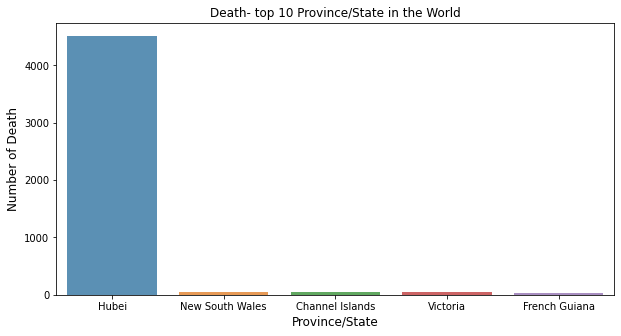

In [ ]:
Province= data.groupby("Province/State")["death"].sum().sort_values(ascending=False)[:5]
plt.figure(figsize=(10,5))
sns.barplot(Province.index, Province.values, alpha=0.8)
plt.title('Death- top 10 Province/State in the World')
plt.ylabel('Number of Death', fontsize=12)
plt.xlabel('Province/State', fontsize=12)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


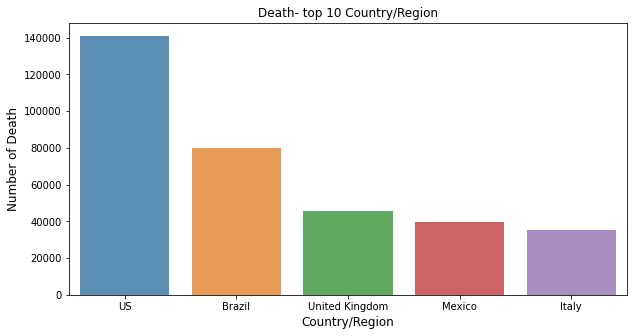

In [ ]:
Country= data.groupby("Country/Region")["death"].sum().sort_values(ascending=False)[:5]
plt.figure(figsize=(10,5))
sns.barplot(Country.index, Country.values, alpha=0.8)
plt.title('Death- top 10 Country/Region')
plt.ylabel('Number of Death', fontsize=12)
plt.xlabel('Country/Region', fontsize=12)
plt.show()


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


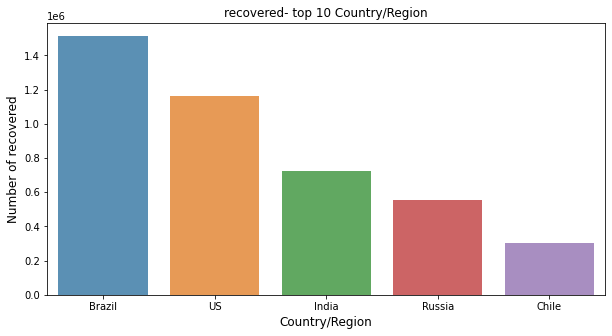

In [ ]:
Province= data.groupby("Country/Region")["recovered"].sum().sort_values(ascending=False)[:5]
plt.figure(figsize=(10,5))
sns.barplot(Province.index, Province.values, alpha=0.8)
plt.title('recovered- top 10 Country/Region')
plt.ylabel('Number of recovered', fontsize=12)
plt.xlabel('Country/Region', fontsize=12)
plt.show()